In [1]:
# Imporing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Reading all csv files
df1_city = pd.read_csv('/content/drive/My Drive/Tictactrip/cities.csv')
df2_prov = pd.read_csv('/content/drive/My Drive/Tictactrip/providers.csv')
df3_station = pd.read_csv('/content/drive/My Drive/Tictactrip/stations.csv')
df4_ticket = pd.read_csv('/content/drive/My Drive/Tictactrip/ticket_data.csv')

In [3]:
# describe() method gives us overal description of dataframe numerical columns only.

print(df1_city.describe())
df1_city.head()

                 id     latitude    longitude    population
count   8040.000000  8040.000000  8040.000000  3.690000e+02
mean    6328.786816    47.223456     6.299331  3.360184e+05
std     3504.698537     3.700934     7.747070  5.840409e+05
min        1.000000     1.370676  -101.397388  1.000460e+05
25%     2501.500000    44.662402     1.214282  1.253750e+05
50%     7003.500000    47.304750     4.887856  1.803020e+05
75%     9014.250000    49.611998    10.311597  3.098690e+05
max    12192.000000    64.145981    48.731938  8.416535e+06


,id,local_name,unique_name,latitude,longitude,population
0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0
1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN
3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0
4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN


In [4]:
print(df2_prov.describe())
df2_prov.head()


                id  company_id
count   227.000000  227.000000
mean    790.656388    9.343612
std    2251.823950    3.036065
min       9.000000    1.000000
25%      66.500000    9.000000
50%     127.000000    9.000000
75%     183.500000    9.000000
max    8389.000000   40.000000


,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus


In [5]:
# To check unique transport types.
df2_prov["transport_type"].unique()

array(['bus', 'car', 'train', 'carpooling'], dtype=object)

In [7]:
print(df3_station.describe())
df3_station.head()

                 id      latitude     longitude
count  11035.000000  11035.000000  11035.000000
mean    5518.026914     47.526678      7.580807
std     3185.719813      3.953972     63.655681
min        1.000000    -22.355790    -22.625538
25%     2759.500000     44.896446      1.358655
50%     5518.000000     47.759670      5.824010
75%     8276.500000     50.349956     12.166133
max    11036.000000     64.137571   6645.000000


,id,unique_name,latitude,longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883
2,3,Aéroport CDG,49.009900,2.559310
3,4,Aéroport de Berlin-Schönefeld,52.389446,13.520345
4,5,Aéroport de Dresden,51.123604,13.764737


In [8]:
""" As the main table is ticket_info tables which is linked with all the tables above. 
so to visualize the data I am using this table for the preprocessing and visualization purpose"""

df4_ticket.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542


#   **Preprocessing of ticket information data table with the help of other dataframes** 

In [9]:
# Copying df4_ticket to Ticket_info dataframe
Ticket_info = df4_ticket.copy()

In [10]:
""" as "middle_stations" and "other_companies" columns have mulptiple values, 
so to split them I am removing curly braces here """

Ticket_info['middle_stations'] = Ticket_info['middle_stations'].str.strip('{}')
Ticket_info['other_companies'] = Ticket_info['other_companies'].str.strip('{}')

In [11]:
""" here I am spliting "middle_stations" and "other_companies" columns values into multiple columns  """

Ticket_info[["middle_stations1", "middle_stations2", "middle_stations3", "middle_stations4"]]= Ticket_info['middle_stations'].str.split(",", n=3, expand = True)
Ticket_info[["company1_id", "company2_id", "company3_id"]] = Ticket_info['other_companies'].str.split(",", n=3, expand = True)

In [12]:
# Drop original columns 
Ticket_info.drop(["middle_stations"],axis=1)
Ticket_info.drop(["other_companies"],axis=1)


,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,o_city,d_city,middle_stations1,middle_stations2,middle_stations3,middle_stations4,company1_id,company2_id,company3_id
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,611,542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"149,418",611,542,149,418,None,None,13,None,None
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"798,798,6794,6246",611,542,798,798,6794,6246,8377,8376,None
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"798,798,6794,6246",611,542,798,798,6794,6246,8377,8376,None
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"5983,5983",611,542,5983,5983,None,None,8380,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279.0,10729.0,2017-10-27 02:30:00+00,2017-10-27 16:00:00+00,2590,2017-10-19 10:35:42.943+00,"408,408",628,562,408,408,None,None,8371,None,None
74164,6869185,9,279.0,304.0,2017-10-27 07:00:00+00,2017-10-27 13:30:00+00,2700,2017-10-19 10:35:42.943+00,"1105,1105",628,562,1105,1105,None,None,9,None,None
74165,6869187,8371,10642.0,304.0,2017-10-27 08:30:00+00,2017-10-27 15:15:00+00,3000,2017-10-19 10:35:42.943+00,"1105,1105",628,562,1105,1105,None,None,9,None,None
74166,6869189,13,279.0,304.0,2017-10-27 13:25:00+00,2017-10-27 21:10:00+00,2880,2017-10-19 10:35:42.943+00,"863,863",628,562,863,863,None,None,13,None,None


In [13]:
# Re-ordering columns for better understanding.
Ticket_info = Ticket_info[['id', 'o_station', 'd_station', 'o_city', 'd_city', 
                           'middle_stations1', 'middle_stations2', 'middle_stations3',
                           'middle_stations4', 'company', 'company1_id', 'company2_id', 
                           'company3_id', 'price_in_cents', 'departure_ts', 'arrival_ts', 'search_ts']]


In [14]:
# Converting time infomation into pandas datetime format
Ticket_info['departure_ts']=pd.to_datetime(Ticket_info['departure_ts'])
Ticket_info['arrival_ts']=pd.to_datetime(Ticket_info['arrival_ts'])

In [15]:
# Calculation of trip duration in minutes
Ticket_info['duration_in_minutes']=(Ticket_info['arrival_ts']-Ticket_info['departure_ts']).astype('timedelta64[m]')

In [16]:
""" Here I am creating columns for o_station and d_station latitude and longitude respectively, 
with the help of stations data table in order to calculate the distance """

start = Ticket_info["o_station"].replace(df3_station.set_index('id')['latitude'])
Ticket_info["o_station_lat"] = start
end = Ticket_info["o_station"].replace(df3_station.set_index('id')['longitude'])
Ticket_info["o_station_lon"] = end
start1 = Ticket_info["d_station"].replace(df3_station.set_index('id')['latitude'])
Ticket_info["d_station_lat"] = start1
end1 = Ticket_info["d_station"].replace(df3_station.set_index('id')['longitude'])
Ticket_info["d_station_lon"] = end1

In [17]:
# Adding "transport_type" column into Ticket_info dataframe as per "company" column id from "df2_prov" table 
transport_type = Ticket_info["company"].replace(df2_prov.set_index('id')['transport_type'])
Ticket_info["transport_type"] = transport_type

In [18]:
# fuction to calculate the distance between two stations using latitude and longtude of both stations
def haversine_distance(lat1, lon1, lat2, lon2):
  r = 6371
  phi1 = np.radians(lat1)
  phi2 = np.radians(lat2)
  delta_phi = np.radians(lat2 - lat1)
  delta_lambda = np.radians(lon2 - lon1)
  a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
  res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
  return np.round(res, 2)

In [19]:
# distance in kilometer per trip
distances_km = []
for row in Ticket_info.itertuples(index=False):
   distances_km.append(
       haversine_distance(row.o_station_lat, row.o_station_lon, row.d_station_lat, row.d_station_lon)
   )

In [20]:
Ticket_info["distance_in_Km"] = distances_km

In [21]:
# creating distance range column using distance_in_km data column values
bins = [1, 201, 401, 801, 1201, 1501, 2000]
labels = ['1-200 Km', '201-400 Km', '401-800 Km', '801-1200 Km', '1201-1500 Km', '1501+ Km']
Ticket_info['distance_range'] = pd.cut(Ticket_info["distance_in_Km"], bins, labels = labels, include_lowest = True)


In [22]:
# Displaying preprocessed final dataframe
Ticket_info.head()

,id,o_station,d_station,o_city,d_city,middle_stations1,middle_stations2,middle_stations3,middle_stations4,company,company1_id,company2_id,company3_id,price_in_cents,departure_ts,arrival_ts,search_ts,duration_in_minutes,o_station_lat,o_station_lon,d_station_lat,d_station_lon,transport_type,distance_in_Km,distance_range
0,6795025,NaN,NaN,611,542,NaN,NaN,NaN,NaN,8385,NaN,NaN,NaN,4550,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,2017-10-01 00:13:31.327+00,370.0,NaN,NaN,NaN,NaN,carpooling,NaN,NaN
1,6795026,63.0,1044.0,611,542,149,418,None,None,9,13,None,None,1450,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,2017-10-01 00:13:35.773+00,1070.0,47.896911,1.854277,43.583932,3.860233,bus,504.17,401-800 Km
2,6795027,5905.0,6495.0,611,542,798,798,6794,6246,8377,8377,8376,None,7400,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,2017-10-01 00:13:40.212+00,1917.0,47.926740,1.906740,43.604900,3.880500,train,504.32,401-800 Km
3,6795028,5905.0,6495.0,611,542,798,798,6794,6246,8377,8377,8376,None,13500,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,2017-10-01 00:13:40.213+00,1295.0,47.926740,1.906740,43.604900,3.880500,train,504.32,401-800 Km
4,6795029,5905.0,6495.0,611,542,5983,5983,None,None,8381,8380,None,None,7710,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,2017-10-01 00:13:40.213+00,1306.0,47.926740,1.906740,43.604900,3.880500,train,504.32,401-800 Km


#  **Extraction and visualization of the meaningful information from data**

In [23]:
# The description of Ticket_info table
Ticket_info.describe()

,id,o_station,d_station,o_city,d_city,company,price_in_cents,duration_in_minutes,o_station_lat,o_station_lon,d_station_lat,d_station_lon,distance_in_Km
count,7.416800e+04,32727.000000,32727.000000,74168.000000,74168.000000,74168.000000,74168.000000,74168.000000,32727.000000,32727.000000,32727.000000,32727.000000,32727.000000
mean,6.832108e+06,2907.132673,2347.858129,849.186105,883.776265,7109.565527,4382.711061,424.620793,47.553924,2.887898,47.518892,3.003004,432.775784
std,2.141060e+04,3347.629180,3090.798007,1485.791782,1654.698575,3005.380792,3739.325367,594.981356,2.332694,2.405996,2.807790,3.044698,212.322699
min,6.795025e+06,3.000000,3.000000,5.000000,1.000000,9.000000,300.000000,20.000000,40.395255,-8.605693,37.099100,-9.099345,16.570000
25%,6.813567e+06,400.000000,396.000000,485.000000,453.000000,8376.000000,1900.000000,180.000000,45.748854,2.316462,45.204457,1.341500,282.030000
50%,6.832108e+06,701.000000,575.000000,628.000000,562.000000,8385.000000,3350.000000,290.000000,48.727660,2.394300,48.103855,3.076675,404.360000
75%,6.850650e+06,6246.000000,4538.000000,628.000000,628.000000,8385.000000,5250.000000,480.000000,48.875600,4.825925,49.176438,4.892386,558.930000
max,6.869192e+06,11017.000000,11017.000000,12190.000000,12190.000000,8387.000000,38550.000000,29571.000000,55.668194,26.065853,59.911190,23.580822,1865.470000


In [24]:
# Grouping duraion and price column values in order to calculate (avg, min, max) of columns values.  

duration_in_minutes_aggregation  = Ticket_info.groupby('price_in_cents').agg({'duration_in_minutes':['mean', 'min', 'max']})
price_in_cents_aggregation = Ticket_info.groupby('duration_in_minutes').agg({'price_in_cents':['mean', 'min', 'max']})

In [25]:
# Reset index 
price_in_cents_aggregation = price_in_cents_aggregation.reset_index()
duration_in_minutes_aggregation = duration_in_minutes_aggregation.reset_index()
print(price_in_cents_aggregation.shape)
print(duration_in_minutes_aggregation.shape)

(1819, 4)
(1699, 4)


In [26]:
""" Both the tables rows count is different, so to make them in one size, 
I am reindexing duration_in_minutes_aggregation table as per the price_in_cents_aggregation table."""

duration_in_minutes_aggregation = duration_in_minutes_aggregation.reindex(price_in_cents_aggregation.index)

In [27]:
print(price_in_cents_aggregation.shape)
print(duration_in_minutes_aggregation.shape)

(1819, 4)
(1819, 4)


In [28]:
# Functin to display both tables side by side

from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)


In [29]:
""" So here I am displaying (avg, min, max) price with respect to duration on left hand side and (avg, min, max) 
 duration with respect to price on right hand side """

display_side_by_side(price_in_cents_aggregation,duration_in_minutes_aggregation)

duration_in_minutes 
 price_in_cents 
 
 
 
 
 mean 
 min 
 max 
 
 
 
 
 0 
 20.0 
 1100.000000 
 1100 
 1100 
 
 
 1 
 30.0 
 400.000000 
 400 
 400 
 
 
 2 
 39.0 
 1610.000000 
 1610 
 1610 
 
 
 3 
 40.0 
 434.482759 
 300 
 600 
 
 
 4 
 41.0 
 1460.000000 
 1460 
 1460 
 
 
 5 
 47.0 
 1500.000000 
 1500 
 1500 
 
 
 6 
 48.0 
 1500.000000 
 1500 
 1500 
 
 
 7 
 49.0 
 910.000000 
 910 
 910 
 
 
 8 
 50.0 
 501.648352 
 300 
 850 
 
 
 9 
 52.0 
 947.142857 
 910 
 1170 
 
 
 10 
 53.0 
 1500.000000 
 1500 
 1500 
 
 
 11 
 54.0 
 957.500000 
 910 
 1540 
 
 
 12 
 55.0 
 1200.000000 
 1200 
 1200 
 
 
 13 
 57.0 
 730.000000 
 730 
 730 
 
 
 14 
 58.0 
 730.000000 
 730 
 730 
 
 
 15 
 60.0 
 621.625344 
 400 
 950 
 
 
 16 
 61.0 
 1300.000000 
 1190 
 1410 
 
 
 17 
 64.0 
 3358.571429 
 1530 
 4330 
 
 
 18 
 65.0 
 2363.333333 
 990 
 3330 
 
 
 19 
 66.0 
 490.000000 
 490 
 490 
 
 
 20 
 67.0 
 1600.000000 
 1600 
 1600 
 
 
 21 
 68.0 
 1794.285714 
 730 
 7500 
 
 
 22 
 69.0 
 900.000000 
 900 
 900 
 
 
 23 
 70.0 
 725.120968 
 400 
 1460 
 
 
 24 
 71.0 
 1230.000000 
 1230 
 1230 
 
 
 25 
 72.0 
 1770.000000 
 1770 
 1770 
 
 
 26 
 73.0 
 994.000000 
 730 
 1540 
 
 
 27 
 74.0 
 1420.000000 
 1420 
 1420 
 
 
 28 
 75.0 
 1210.000000 
 900 
 1520 
 
 
 29 
 76.0 
 1850.000000 
 1850 
 1850 
 
 
 30 
 77.0 
 1210.000000 
 1210 
 1210 
 
 
 31 
 80.0 
 1226.079430 
 400 
 9800 
 
 
 32 
 82.0 
 1833.333333 
 1600 
 2050 
 
 
 33 
 84.0 
 1320.000000 
 730 
 1940 
 
 
 34 
 85.0 
 4445.000000 
 1940 
 6950 
 
 
 35 
 86.0 
 1570.000000 
 1510 
 1630 
 
 
 36 
 88.0 
 1357.000000 
 730 
 2480 
 
 
 37 
 89.0 
 3510.769231 
 2480 
 8330 
 
 
 38 
 90.0 
 988.396226 
 400 
 7130 
 
 
 39 
 91.0 
 2662.500000 
 1500 
 4250 
 
 
 40 
 92.0 
 1920.000000 
 1900 
 1940 
 
 
 41 
 93.0 
 2180.937500 
 1300 
 3200 
 
 
 42 
 94.0 
 1588.750000 
 930 
 2350 
 
 
 43 
 95.0 
 3586.000000 
 1288 
 6630 
 
 
 44 
 96.0 
 2185.000000 
 1690 
 2430 
 
 
 45 
 97.0 
 5207.631579 
 1740 
 5750 
 
 
 46 
 98.0 
 1993.333333 
 1500 
 2240 
 
 
 47 
 99.0 
 1980.000000 
 1500 
 2230 
 
 
 48 
 100.0 
 1062.008247 
 500 
 13100 
 
 
 49 
 101.0 
 2920.000000 
 1160 
 4550 
 
 
 50 
 102.0 
 1392.000000 
 920 
 1540 
 
 
 51 
 103.0 
 1866.000000 
 1290 
 3590 
 
 
 52 
 104.0 
 2005.833333 
 900 
 2220 
 
 
 53 
 105.0 
 2233.333333 
 1290 
 3000 
 
 
 54 
 106.0 
 2422.222222 
 1500 
 3530 
 
 
 55 
 107.0 
 3688.571429 
 1500 
 6300 
 
 
 56 
 108.0 
 4318.500000 
 730 
 20900 
 
 
 57 
 109.0 
 5586.153846 
 1950 
 13100 
 
 
 58 
 110.0 
 1244.670139 
 500 
 9300 
 
 
 59 
 111.0 
 5234.411765 
 1500 
 9800 
 
 
 60 
 112.0 
 2392.857143 
 730 
 3440 
 
 
 61 
 113.0 
 2830.444444 
 1984 
 3630 
 
 
 62 
 114.0 
 4636.000000 
 1800 
 7900 
 
 
 63 
 115.0 
 4891.071429 
 1520 
 8900 
 
 
 64 
 116.0 
 3347.407407 
 1100 
 9300 
 
 
 65 
 117.0 
 4439.166667 
 1350 
 8900 
 
 
 66 
 118.0 
 2852.600000 
 1782 
 5370 
 
 
 67 
 119.0 
 5319.583333 
 920 
 7300 
 
 
 68 
 120.0 
 1458.674434 
 500 
 12850 
 
 
 69 
 121.0 
 3296.833333 
 1630 
 7700 
 
 
 70 
 122.0 
 3505.500000 
 1460 
 7300 
 
 
 71 
 123.0 
 4199.555556 
 2980 
 8500 
 
 
 72 
 124.0 
 5394.909091 
 1280 
 9300 
 
 
 73 
 125.0 
 3148.923077 
 1906 
 5530 
 
 
 74 
 126.0 
 3712.932039 
 1170 
 7250 
 
 
 75 
 127.0 
 3533.333333 
 1280 
 6900 
 
 
 76 
 128.0 
 3894.451613 
 1400 
 5370 
 
 
 77 
 129.0 
 6465.000000 
 3070 
 12800 
 
 
 78 
 130.0 
 1473.861386 
 500 
 8650 
 
 
 79 
 131.0 
 2710.736842 
 1230 
 7570 
 
 
 80 
 132.0 
 4191.428571 
 1380 
 6600 
 
 
 81 
 133.0 
 4820.000000 
 2130 
 8270 
 
 
 82 
 134.0 
 4219.565217 
 1280 
 7630 
 
 
 83 
 135.0 
 5060.695652 
 1906 
 11300 
 
 
 84 
 136.0 
 5486.440678 
 1080 
 8600 
 
 
 85 
 137.0 
 3097.421053 
 1660 
 10980 
 
 
 86 
 138.0 
 4595.294118 
 700 
 6040 
 
 
 87 
 139.0 
 4058.750000 
 1340 
 6200 
 
 
 88 
 140.0 
 1555.821326 
 600 
 17600 
 
 
 89 
 141.0 
 3995.733333 


In [30]:
# Here I am creating seprate dataframe with 3 columns as shown below, to find the relationship between them
df = pd.DataFrame(Ticket_info, columns=["transport_type", "price_in_cents", "duration_in_minutes"])


  transport_type  price_in_cents  duration_in_minutes
0            bus     3652.448036           937.996159
1     carpooling     2742.171907           246.638836
2          train     8506.634793           440.057267



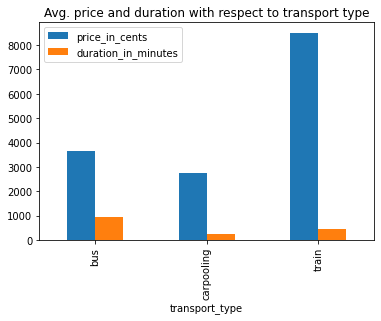

In [31]:
# Calculating average price and duration time with respect to "transport_type" with visualization
avg_price_duration = df.groupby("transport_type").mean().reset_index()
print(avg_price_duration)
print("")
df.groupby('transport_type').mean().plot(kind='bar')
plt.title("Avg. price and duration with respect to transport type")
plt.show()


In [37]:
# Average duration with respect to distance_range and transport_type
avg_duration = Ticket_info.groupby(by=['transport_type', 'distance_range']).agg({'duration_in_minutes':'mean'}).rename(columns={'duration_in_minutes':'average_duration'})
avg_duration


average_duration
transport_type distance_range                  
bus            1-200 Km              645.229915
               201-400 Km            737.013966
               401-800 Km           1000.358062
               801-1200 Km          1563.466874
               1201-1500 Km         2179.882353
               1501+ Km             2435.415094
carpooling     1-200 Km                     NaN
               201-400 Km                   NaN
               401-800 Km                   NaN
               801-1200 Km                  NaN
               1201-1500 Km                 NaN
               1501+ Km                     NaN
train          1-200 Km              261.876346
               201-400 Km            406.823559
               401-800 Km            521.468461
               801-1200 Km           733.041009
               1201-1500 Km                 NaN
               1501+ Km                     NaN

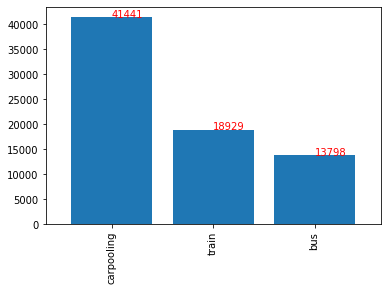

In [33]:
# Count total trips of each transport type
total_count = Ticket_info['transport_type'].value_counts()
ax=total_count.plot.bar(width=.8) 

for i, v in total_count.reset_index().iterrows():
  ax.text(i, v.transport_type + 0.2 , v.transport_type, color='red')


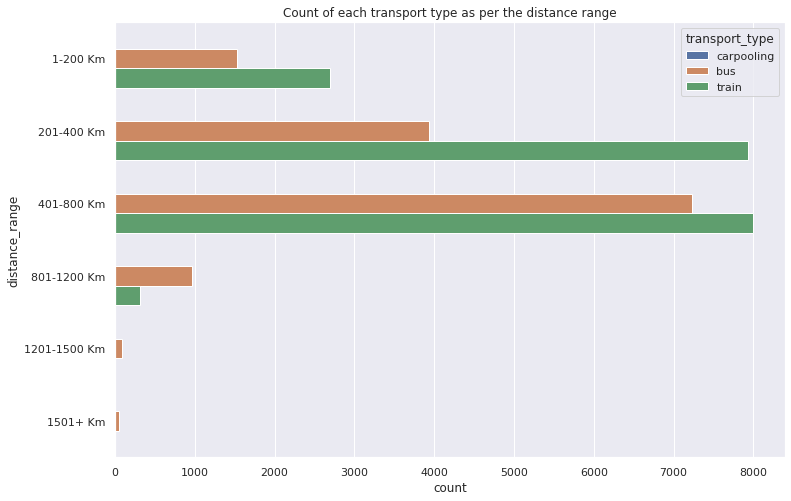

In [38]:
# Count of total trips as per the distance range
plt.figure(figsize=(12,8))
plt.title('Count of each transport type as per the distance range')
sns.set(style="darkgrid")
count_total_trips = sns.countplot(y="distance_range", hue="transport_type", data=Ticket_info)
